In [ ]:
# Recreate figure analyses and plots - does not require caveCLIENT permissions

In [1]:
# import packages
import pandas as pd
from matplotlib import pyplot,patches
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cmocean

In [2]:
# import dataframe
multi_df = pd.read_pickle('preMN_to_MN_wing_v604.pkl')
properties_df = pd.read_pickle('wingMN_properties_v604.pkl')


In [3]:
# multi_df is already organized. Cosine similarity metrics are (re-)calculated below

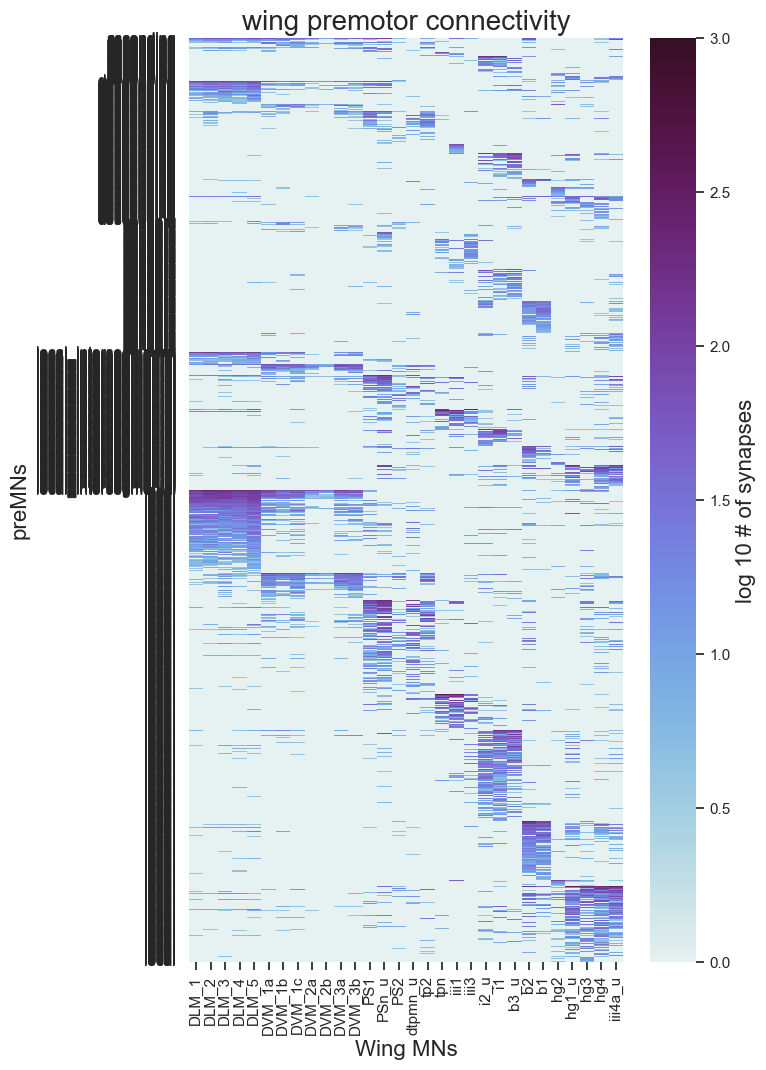

In [6]:
# plotting code for wing premotor connectome
source = multi_df

fig = plt.figure(1, figsize = [7,12])
sns.set(font_scale= 1)
cmap = cmocean.cm.dense

log_values = np.log10(source +1)
pmn_ids = source.index.get_level_values(level='cell_class').to_list()
mn_ids = source.columns.to_list()
ax = sns.heatmap(log_values, vmin = 0, vmax = 3, xticklabels=mn_ids, yticklabels=pmn_ids, cmap = cmap)

ax.xaxis.set_ticks_position('bottom')
cbar = ax.collections[0].colorbar
plt.title('wing premotor connectivity', size = 20)
cbar.set_label(label = 'log 10 # of synapses', size=16)
plt.xlabel('Wing MNs', size = 16)
plt.ylabel('preMNs', size = 16)

plt.show()

In [34]:
# plot proportions from each cell class
df_by_cell_class = multi_df.groupby(level='cell_class').sum().T.rename_axis('MN_label').reset_index()

dict_syn = dict(zip(properties_df.MN_label, properties_df.synapses_include_fragments))

df_by_cell_class['synapses_with_fragments'] = df_by_cell_class.MN_label.map(dict_syn)

# dataframe of proportions for plotting
df_by_cell_class_proportions = df_by_cell_class[['local','local_intersegmental','descending','sensory','ascending']].divide(df_by_cell_class.synapses_with_fragments, axis=0)


In [35]:
df_by_cell_class_proportions.index = df_by_cell_class['MN_label']
df_by_cell_class_proportions['fragment'] = df_by_cell_class_proportions.apply(
    lambda x: 1 - (x['ascending'] + x['descending'] + x['sensory'] + x['local_intersegmental'] + x['local']), axis=1)


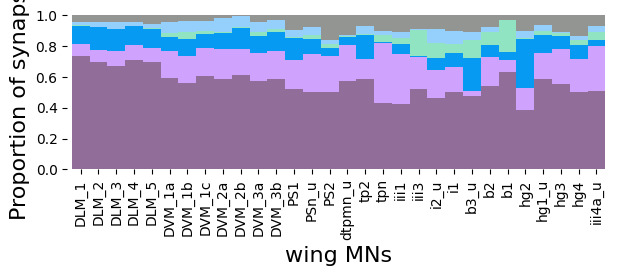

In [36]:
source = df_by_cell_class_proportions

colors_cell_class = ["#916e99","#cea2fd","#069af3","#90e4c1","#95d0fc","#929591", "#650021"]
cmap = sns.set_palette(sns.color_palette(colors_cell_class))

#create stacked bar chart
p = source.plot(kind='bar', stacked=True, width = 1, legend = False, cmap = cmap, figsize=(7, 2)) 

p.set_ylabel("Proportion of synapses",fontsize = 16)
p.set(ylim=(0, 1))
p.set_xlabel("wing MNs", fontsize = 16)
plt.box(on = False)

plt.show()

In [38]:
# for all wing MNs combined
df_by_cell_class.sum()

cell_class
MN_label                   DLM_1DLM_2DLM_3DLM_4DLM_5DVM_1aDVM_1bDVM_1cDVM...
ascending                                                               6723
descending                                                             16691
sensory                                                                 7053
local_intersegmental                                                   29025
local                                                                  91902
synapses_with_fragments                                               163689
dtype: object